<a href="https://www.kaggle.com/code/oussamaelkhsoui/fashion-mnist-rnn-lstm-globalmaxpoolnd?scriptVersionId=146863036" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
import tensorflow as tf

In [3]:
data = tf.keras.datasets.fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
import numpy as np
a = np.unique(y_train)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
x_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
N, T, D = x_train.shape
T, D

(28, 28)

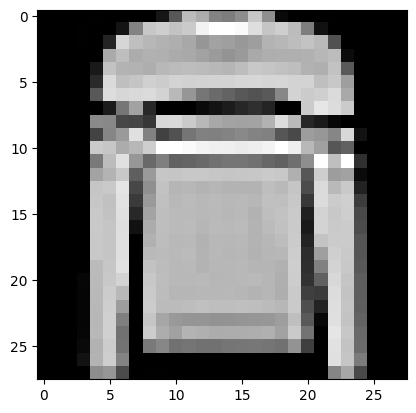

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5], cmap='gray')

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(T, D)),
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
1875/1875 [==============================] - 14s 5ms/step - loss: 0.6674 - accuracy: 0.7646 - val_loss: 0.5421 - val_accuracy: 0.8020
Epoch 2/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5093 - accuracy: 0.8156 - val_loss: 0.5076 - val_accuracy: 0.8107
Epoch 3/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4735 - accuracy: 0.8267 - val_loss: 0.4747 - val_accuracy: 0.8307
Epoch 4/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4539 - accuracy: 0.8331 - val_loss: 0.4765 - val_accuracy: 0.8228
Epoch 5/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4472 - accuracy: 0.8349 - val_loss: 0.4766 - val_accuracy: 0.8260
Epoch 6/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4397 - accuracy: 0.8376 - val_loss: 0.4684 - val_accuracy: 0.8288
Epoch 7/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4280 - accuracy: 0.8414 - val_loss: 0.4562 - val_a

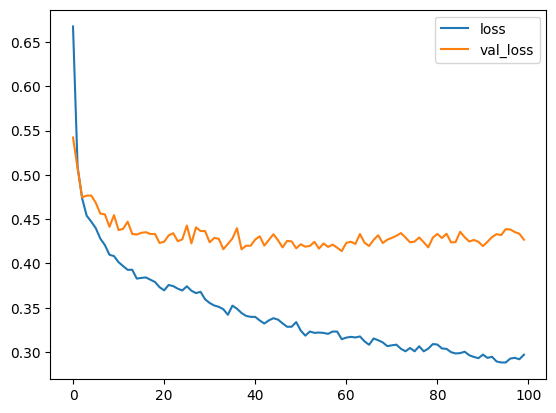

In [10]:
plt.plot(r.history['loss'], label="loss")
plt.plot(r.history['val_loss'], label="val_loss")
plt.legend()

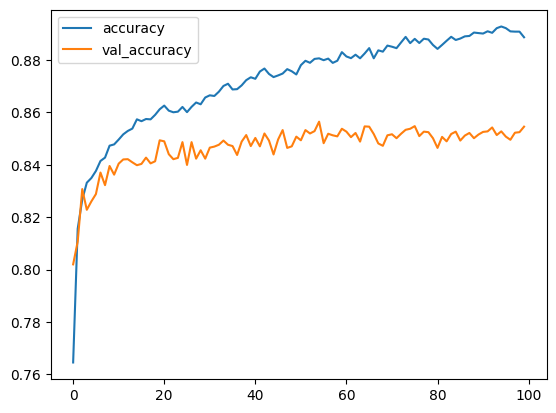

In [11]:
plt.plot(r.history['accuracy'], label="accuracy")
plt.plot(r.history['val_accuracy'], label="val_accuracy")
plt.legend()

In [12]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(T, D)),
    tf.keras.layers.LSTM(100, return_sequences=True),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(10, activation="softmax")
])
model2.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
r2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
1875/1875 [==============================] - 11s 5ms/step - loss: 0.7190 - accuracy: 0.7574 - val_loss: 0.5758 - val_accuracy: 0.7922
Epoch 2/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5354 - accuracy: 0.8067 - val_loss: 0.5462 - val_accuracy: 0.7960
Epoch 3/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5095 - accuracy: 0.8141 - val_loss: 0.5227 - val_accuracy: 0.8124
Epoch 4/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4930 - accuracy: 0.8188 - val_loss: 0.5170 - val_accuracy: 0.8102
Epoch 5/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4869 - accuracy: 0.8203 - val_loss: 0.5122 - val_accuracy: 0.8148
Epoch 6/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4774 - accuracy: 0.8247 - val_loss: 0.5225 - val_accuracy: 0.8089
Epoch 7/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4649 - accuracy: 0.8286 - val_loss: 0.4936 - val_a

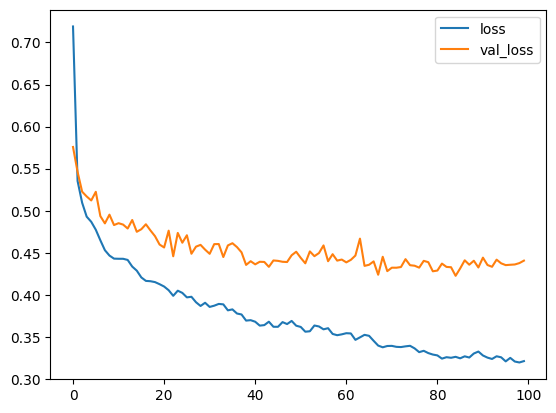

In [13]:
plt.plot(r2.history['loss'], label="loss")
plt.plot(r2.history['val_loss'], label="val_loss")
plt.legend()

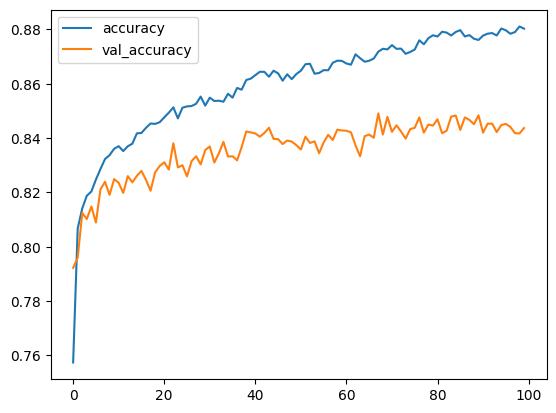

In [14]:
plt.plot(r2.history['accuracy'], label="accuracy")
plt.plot(r2.history['val_accuracy'], label="val_accuracy")
plt.legend()